# Data Loading

In [ ]:
import pandas as pd
import numpy as np
import random

# Set seeds
np.random.seed(42)
random.seed(42)

df = pd.read_excel('DIB dataset and codebook.xlsx')

# Class Conversion
## (Add all the target columns and save the values in another column)
## (Convert those values between 0 and 1)
## (If <= 0.5, assign 0, otherwise assign 1)
## This will be our target column

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your dataframe and it already contains the OS columns

# Step 1: Add all the OS columns
df['Occupational_Stress_Sum'] = df[['OS1', 'OS2', 'OS3', 'OS4', 'OS5', 'OS6', 'OS7', 'OS8',
                                    'OS9', 'OS10', 'OS11', 'OS12', 'OS13', 'OS14',
                                    'OS15', 'OS16', 'OS17', 'OS18', 'OS19',
                                    'OS20', 'OS21', 'OS22', 'OS23',
                                    'OS24', 'OS25', 'OS26', 'OS27', 'OS28',
                                    'OS29', 'OS30', 'OS31',
                                    'OS32', 'OS33', 'OS34', 'OS35',
                                    'OS36', 'OS37', 'OS38', 'OS39',
                                    'OS40', 'OS41']].sum(axis=1)

# Step 2: Normalize the summed values between 0 and 1
scaler = MinMaxScaler()
df['Occupational_Stress_Normalized'] = scaler.fit_transform(df[['Occupational_Stress_Sum']])

# Step 3: Assign 0 or 1 based on the condition
df['Occupational_Stress_Target'] = df['Occupational_Stress_Normalized'].apply(lambda x: 0 if x <= 0.5 else 1)

# Optional: You might want to drop the intermediate columns if they are not needed
# df = df.drop(columns=['Occupational_Stress_Sum', 'Occupational_Stress_Normalized'])



In [ ]:
df.drop(columns=['OS1', 'OS2', 'OS3', 'OS4', 'OS5', 'OS6', 'OS7', 'OS8', 'OS9', 'OS10', 'OS11', 'OS12', 'OS13', 'OS14', 'OS15', 'OS16', 'OS17', 'OS18', 'OS19', 'OS20', 'OS21', 'OS22', 'OS23', 'OS24', 'OS25', 'OS26', 'OS27', 'OS28', 'OS29', 'OS30', 'OS31', 'OS32', 'OS33', 'OS34', 'OS35', 'OS36', 'OS37', 'OS38', 'OS39', 'OS40', 'OS41'], inplace=True)
df = df.drop(columns=['Occupational_Stress_Sum', 'Occupational_Stress_Normalized'])

In [ ]:
df.head()

,Age,Religion,Ethnicity,Marital status,Marriage period,No. of children,Educational level,Employment status,Working period,Household income,...,JS34,JS35,JS36,JP1,JP2,JP3,JP4,JP5,JP6,Occupational_Stress_Target
0,2,1,1,1,1,1,6,1,4,7,...,4,4,4,4,4,4,2,5,5,1
1,2,1,1,1,2,1,6,1,3,4,...,3,5,5,5,5,4,5,5,5,1
2,2,1,1,1,2,1,6,1,5,7,...,5,5,5,5,5,5,5,5,5,1
3,3,1,1,2,1,2,5,1,5,10,...,5,5,5,2,2,2,4,5,5,1
4,2,1,1,1,1,1,6,1,3,5,...,5,5,5,5,5,5,5,5,5,1


In [ ]:
df.tail()

,Age,Religion,Ethnicity,Marital status,Marriage period,No. of children,Educational level,Employment status,Working period,Household income,...,JS34,JS35,JS36,JP1,JP2,JP3,JP4,JP5,JP6,Occupational_Stress_Target
304,4,1,1,2,2,2,6,1,5,7,...,4,4,4,5,5,5,5,5,5,1
305,2,1,1,1,2,2,9,1,5,8,...,2,2,2,4,4,2,4,4,4,0
306,2,1,1,1,3,1,6,1,5,2,...,4,5,4,5,5,5,5,5,5,1
307,3,1,1,2,1,3,5,1,5,2,...,2,2,2,4,4,4,4,4,5,0
308,2,1,1,1,2,1,6,1,5,6,...,4,4,4,4,4,4,5,5,5,0


# Data Inspection (Statistical)

In [ ]:
import pandas as pd

# Assuming df is your DataFrame after loading the data and preprocessing the target column

# Step 1: Basic Structure
print("DataFrame Shape (Rows, Columns):", df.shape)
print("\nFirst 5 Rows of DataFrame:")
print(df.head())

DataFrame Shape (Rows, Columns): (309, 54)

First 5 Rows of DataFrame:
   Age  Religion  Ethnicity  Marital status  Marriage period  No. of children  \
0    2         1          1               1                1                1   
1    2         1          1               1                2                1   
2    2         1          1               1                2                1   
3    3         1          1               2                1                2   
4    2         1          1               1                1                1   

   Educational level  Employment status  Working period  Household income  \
0                  6                  1               4                 7   
1                  6                  1               3                 4   
2                  6                  1               5                 7   
3                  5                  1               5                10   
4                  6                  1               3  

In [ ]:
# Step 2: Descriptive Statistics
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())


Descriptive Statistics for Numerical Columns:
              Age    Religion   Ethnicity  Marital status  Marriage period  \
count  309.000000  309.000000  309.000000      309.000000       309.000000   
mean     2.165049    1.084142    1.129450        1.100324         1.883495   
std      0.604589    0.433246    0.560676        0.300918         0.772510   
min      1.000000    1.000000    1.000000        1.000000         1.000000   
25%      2.000000    1.000000    1.000000        1.000000         1.000000   
50%      2.000000    1.000000    1.000000        1.000000         2.000000   
75%      2.000000    1.000000    1.000000        1.000000         2.000000   
max      5.000000    4.000000    5.000000        2.000000         3.000000   

       No. of children  Educational level  Employment status  Working period  \
count       309.000000         309.000000         309.000000      309.000000   
mean          1.323625           6.019417           1.042071        4.433657   
std       

In [ ]:
# Step 3: Data Types
print("\nData Types of Each Column:")
print(df.dtypes)



Data Types of Each Column:
Age                           int64
Religion                      int64
Ethnicity                     int64
Marital status                int64
Marriage period               int64
No. of children               int64
Educational level             int64
Employment status             int64
Working period                int64
Household income              int64
Sperm quality                 int64
JS1                           int64
JS2                           int64
JS3                           int64
JS4                           int64
JS5                           int64
JS6                           int64
JS7                           int64
JS8                           int64
JS9                           int64
JS10                          int64
JS11                          int64
JS12                          int64
JS13                          int64
JS14                          int64
JS15                          int64
JS16                          int64


In [ ]:
# Step 4: Missing Values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Age                           0
Religion                      0
Ethnicity                     0
Marital status                0
Marriage period               0
No. of children               0
Educational level             0
Employment status             0
Working period                0
Household income              0
Sperm quality                 0
JS1                           0
JS2                           0
JS3                           0
JS4                           0
JS5                           0
JS6                           0
JS7                           0
JS8                           0
JS9                           0
JS10                          0
JS11                          0
JS12                          0
JS13                          0
JS14                          0
JS15                          0
JS16                          0
JS17                          0
JS18                          0
JS19                          0
JS20    

In [ ]:
# Step 5: Unique Values in Each Column (Especially useful for categorical data)
print("\nNumber of Unique Values in Each Column:")
print(df.nunique())


Number of Unique Values in Each Column:
Age                            5
Religion                       4
Ethnicity                      5
Marital status                 2
Marriage period                3
No. of children                3
Educational level              8
Employment status              3
Working period                 5
Household income              10
Sperm quality                  8
JS1                            5
JS2                            5
JS3                            5
JS4                            5
JS5                            5
JS6                            5
JS7                            5
JS8                            5
JS9                            5
JS10                           5
JS11                           5
JS12                           5
JS13                           5
JS14                           5
JS15                           5
JS16                           5
JS17                           5
JS18                           5
JS

In [ ]:
# Replace 'CATEGORICAL_COLUMN' with your actual categorical column names
for column in ['Religion', 'Ethnicity', 'Marital status']:
    print(f"\nValue Counts for {column}:")
    print(df[column].value_counts())


Value Counts for Religion:
Religion
1    297
3      8
4      3
2      1
Name: count, dtype: int64

Value Counts for Ethnicity:
Ethnicity
1    291
3     10
2      3
4      3
5      2
Name: count, dtype: int64

Value Counts for Marital status:
Marital status
1    278
2     31
Name: count, dtype: int64


# Exploratory Data Analysis (Later)

# Data Splitting

In [ ]:
import pandas as pd
# import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Step 1: Split the data into training and test sets
# Let's separate features and target for splitting; replace 'YourFeatures' & 'Occupational_Stress_Target' with actual column names
X = df.drop(['Occupational_Stress_Target'], axis=1)  # Features
y = df['Occupational_Stress_Target']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42) #31 diye run #manual seed diye run


# Normalization

In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame for easier handling
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

#Handle Outliers(Mean)

Age - Number of Outliers: 0


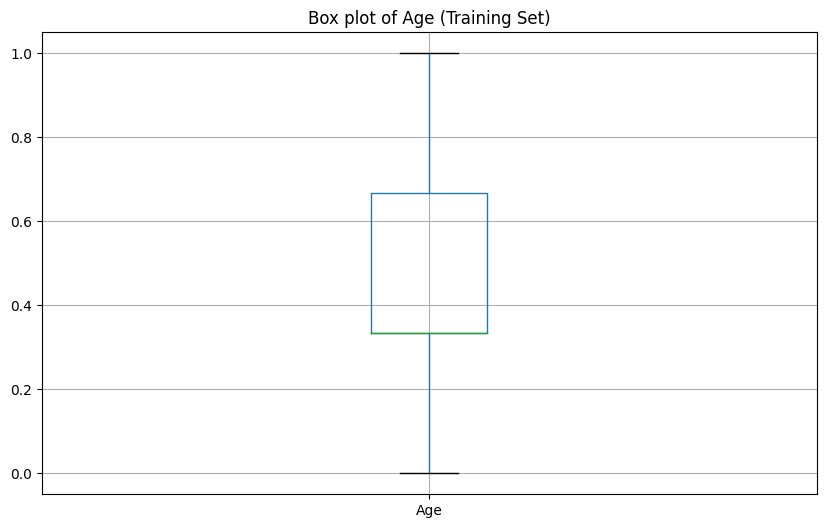

Religion - Number of Outliers: 11


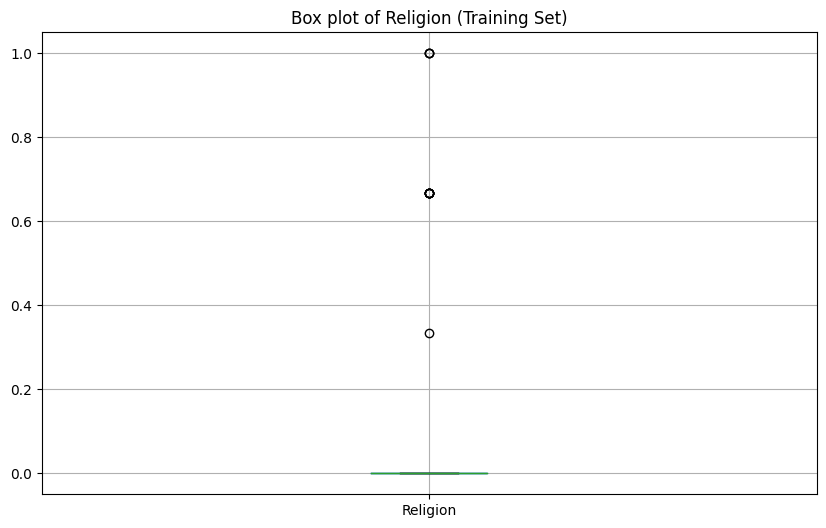

Ethnicity - Number of Outliers: 16


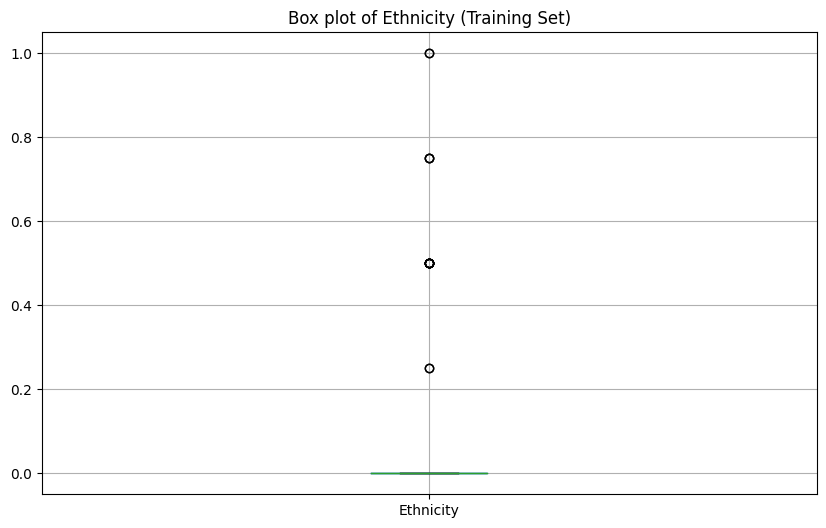

Marital status - Number of Outliers: 25


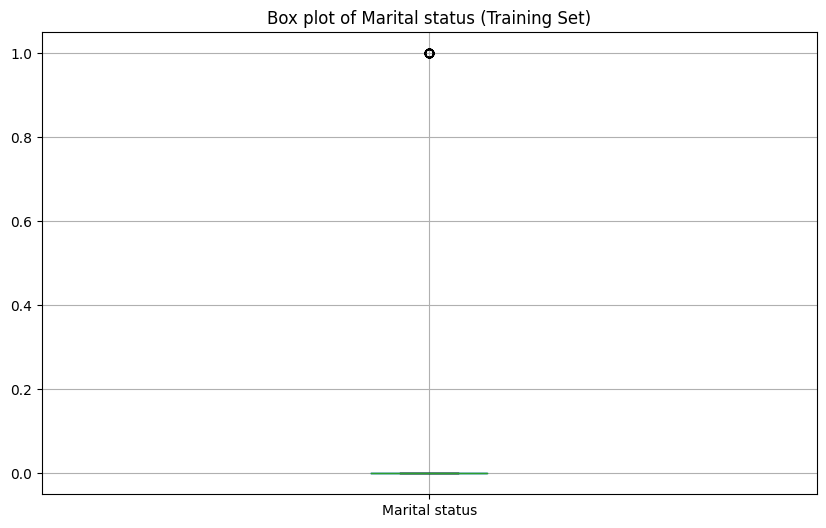

Marriage period - Number of Outliers: 0


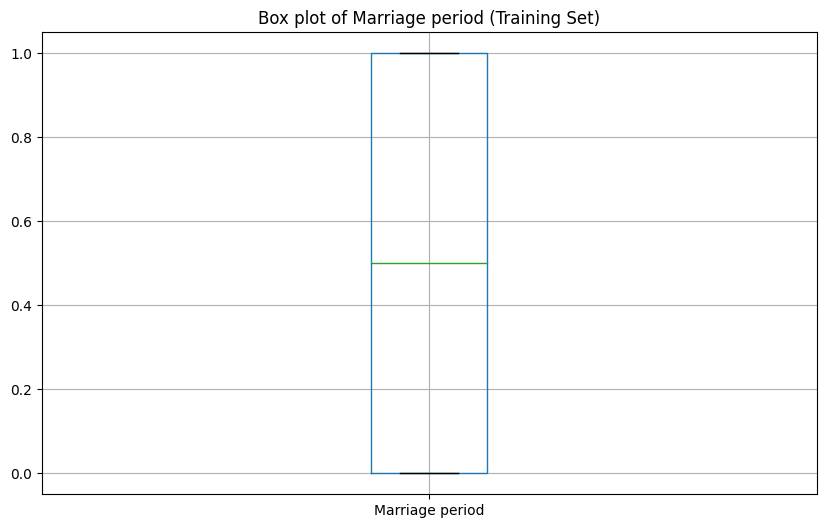

No. of children - Number of Outliers: 0


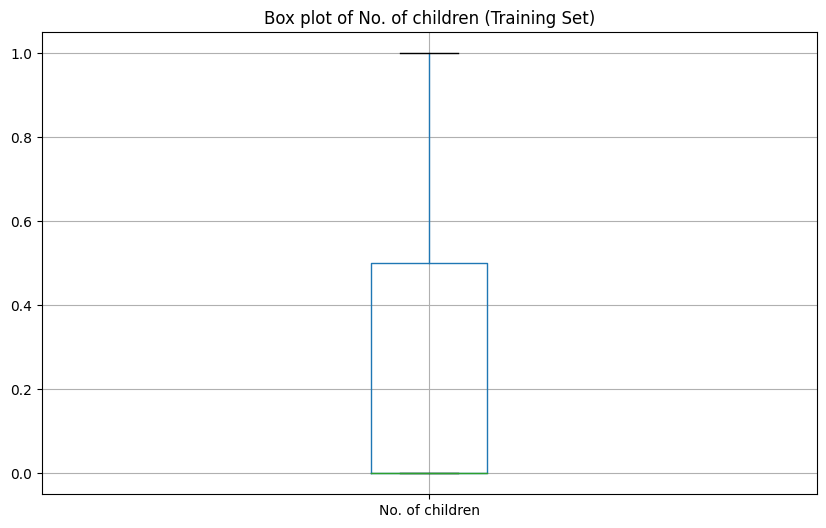

Educational level - Number of Outliers: 0


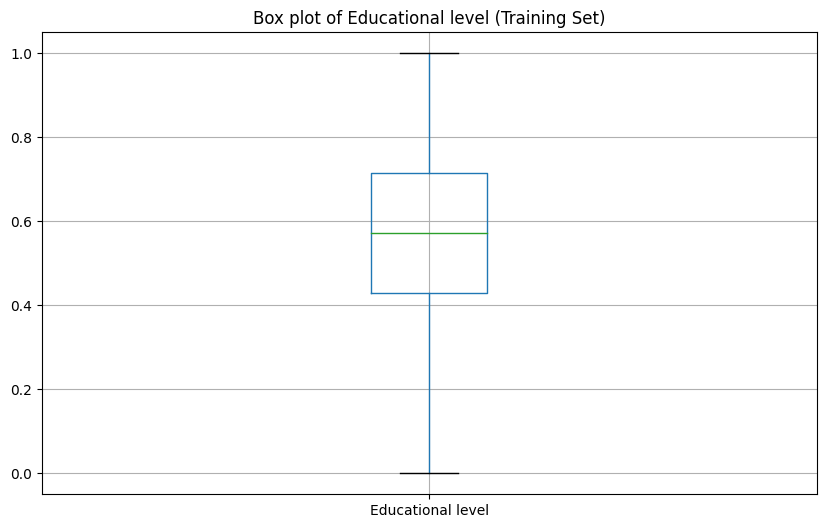

Employment status - Number of Outliers: 8


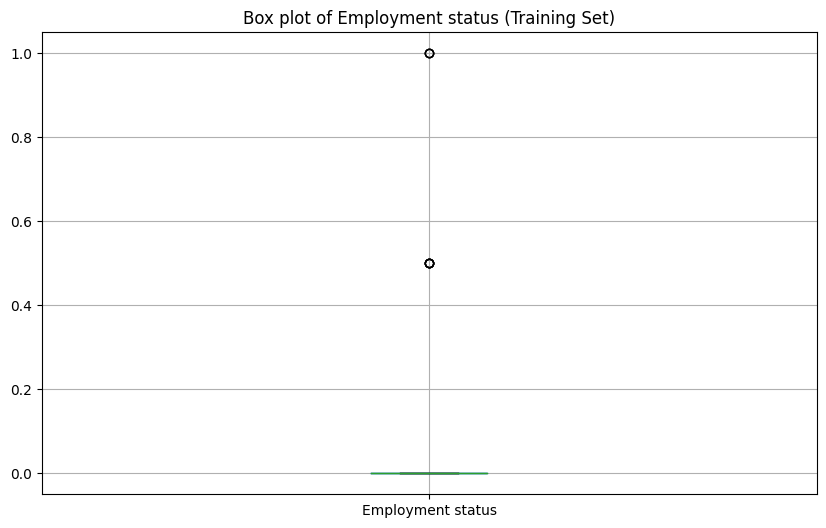

Working period - Number of Outliers: 13


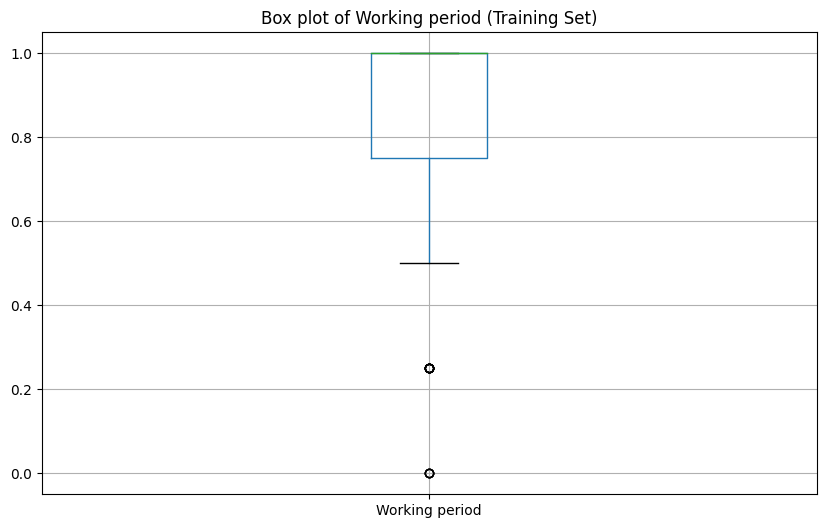

Household income - Number of Outliers: 0


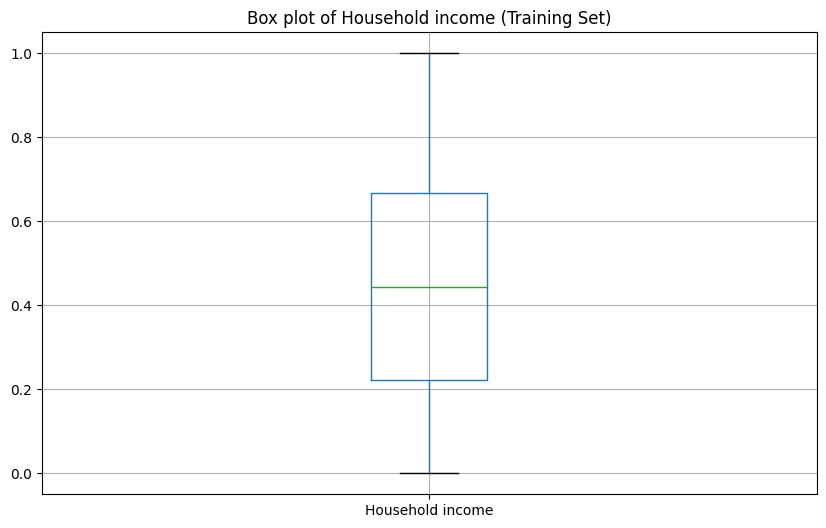

Sperm quality - Number of Outliers: 29


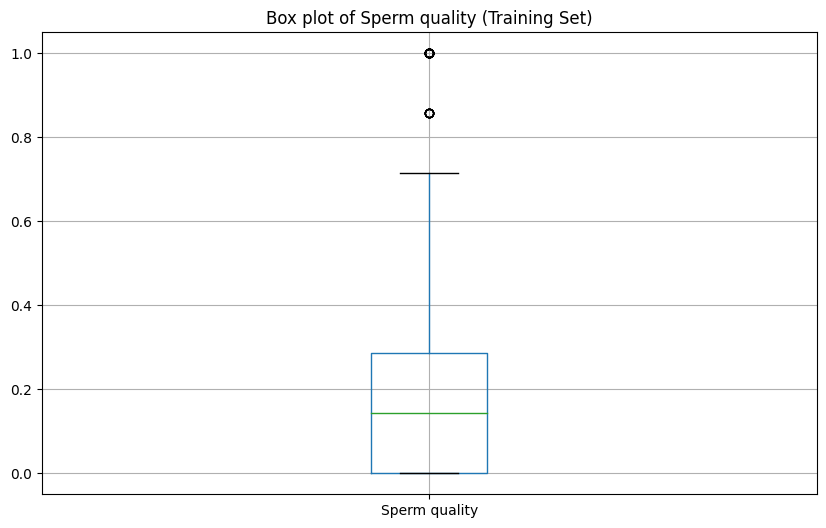

JS1 - Number of Outliers: 19


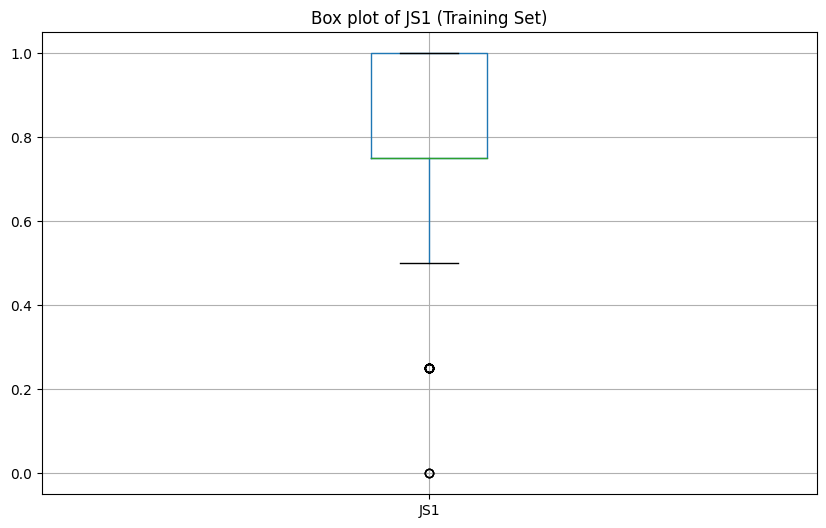

JS2 - Number of Outliers: 0


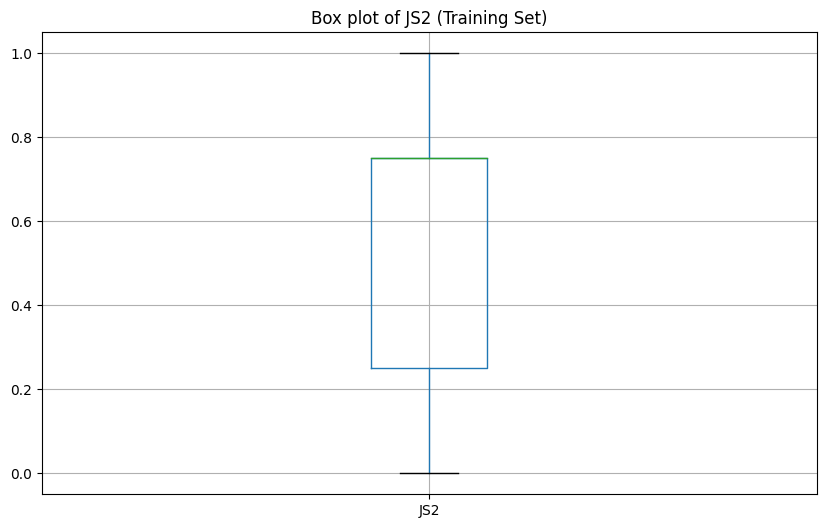

JS3 - Number of Outliers: 0


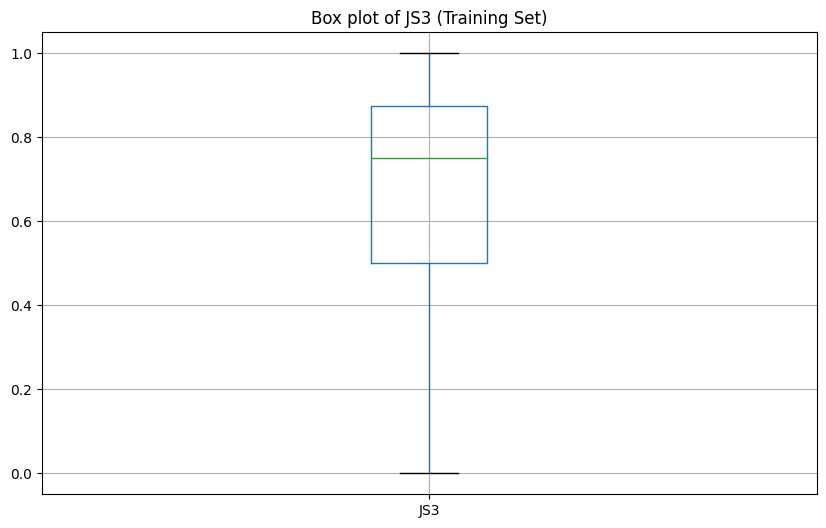

JS4 - Number of Outliers: 9


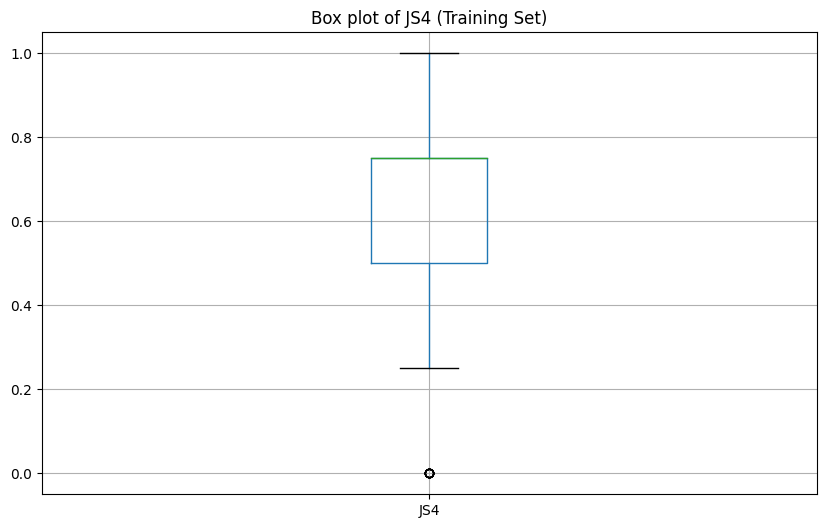

JS5 - Number of Outliers: 0


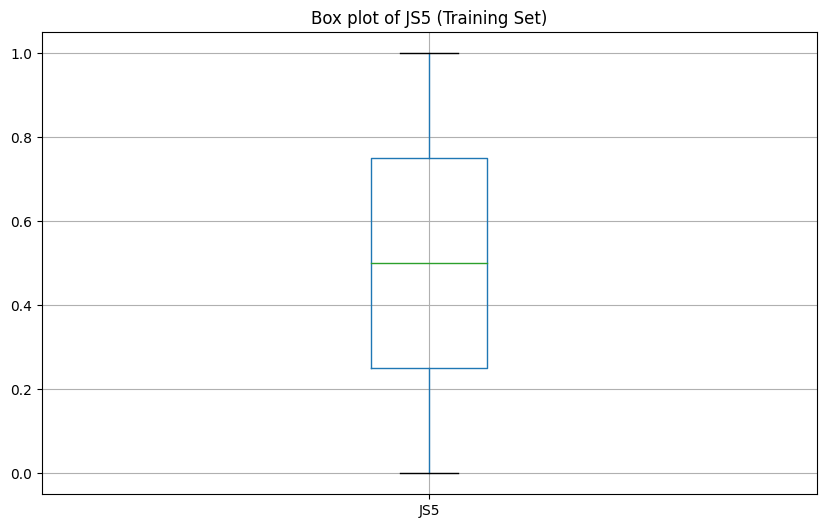

JS6 - Number of Outliers: 10


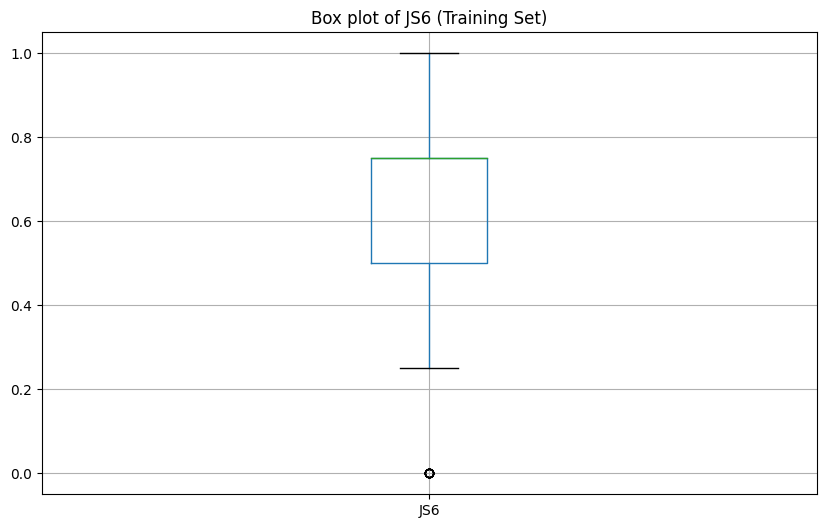

JS7 - Number of Outliers: 0


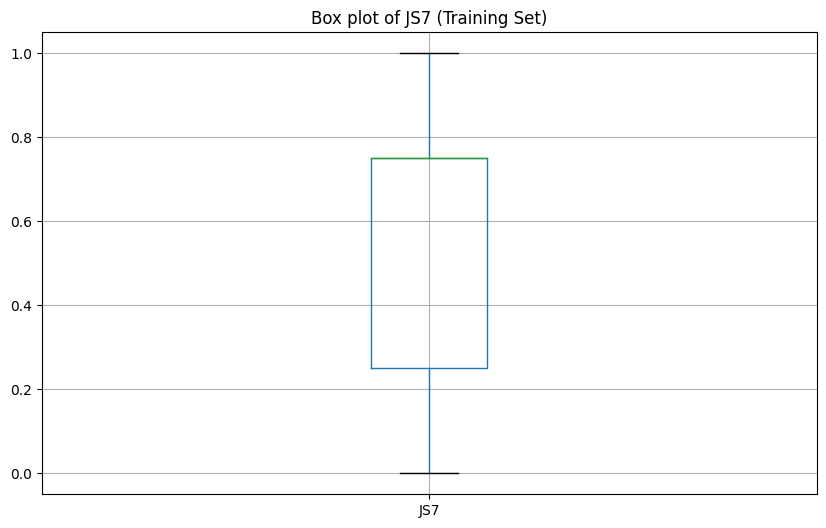

JS8 - Number of Outliers: 3


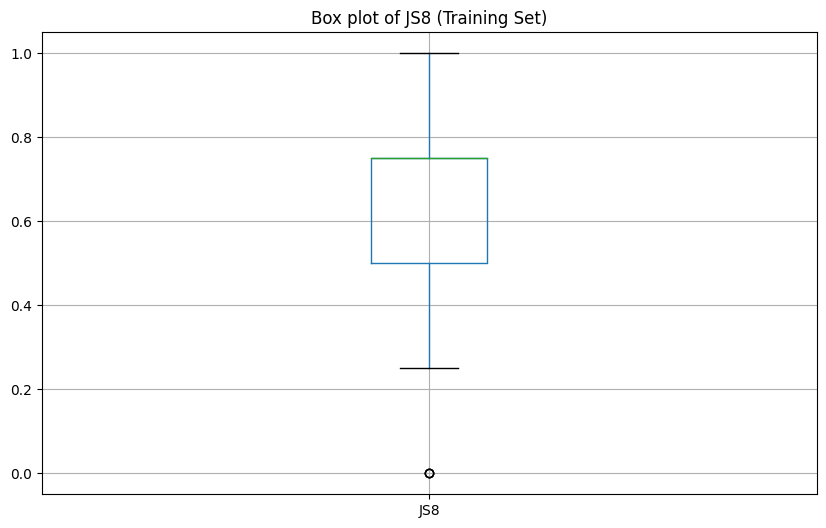

JS9 - Number of Outliers: 103


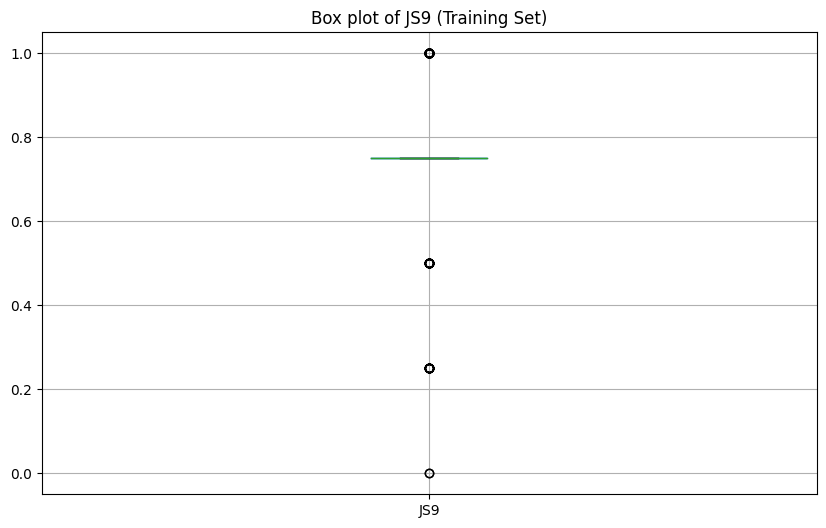

JS10 - Number of Outliers: 25


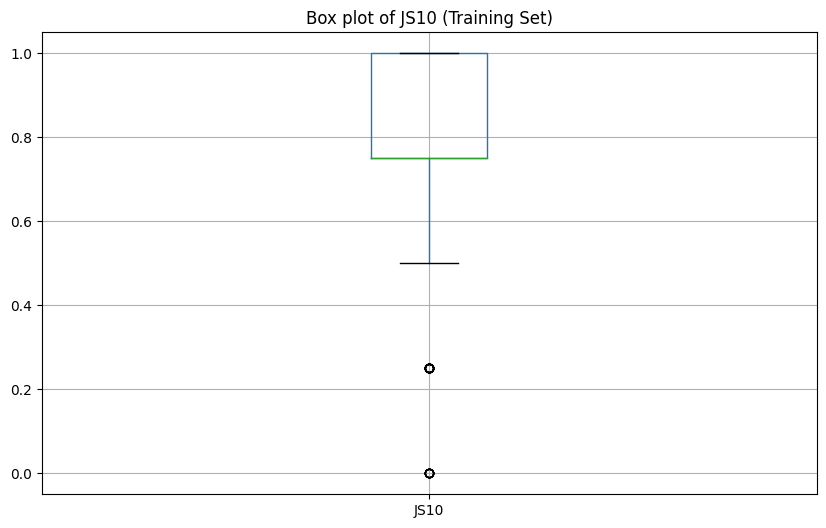

JS11 - Number of Outliers: 8


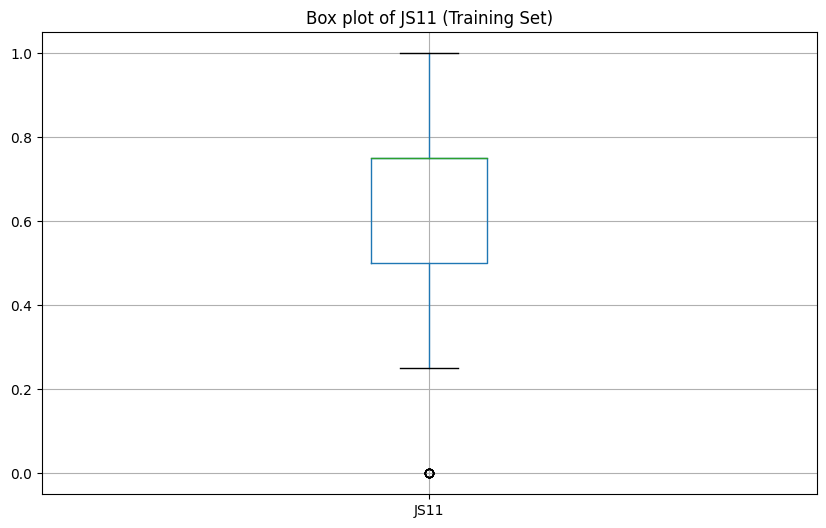

JS12 - Number of Outliers: 8


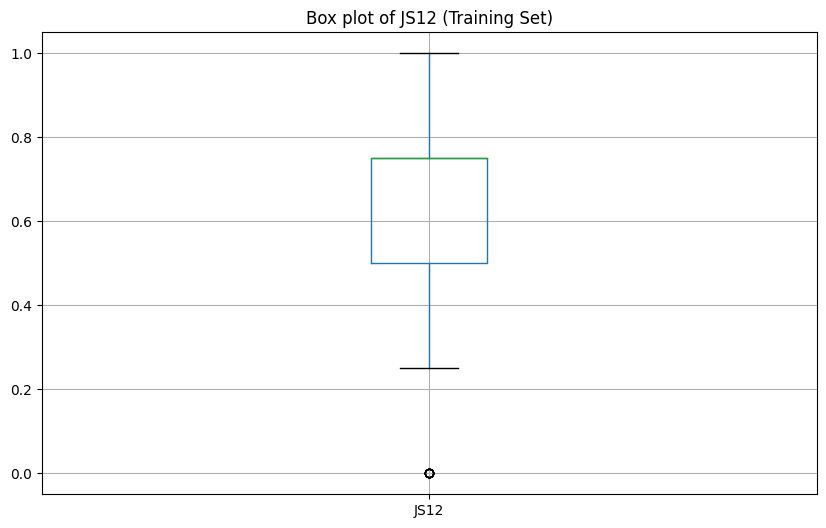

JS13 - Number of Outliers: 6


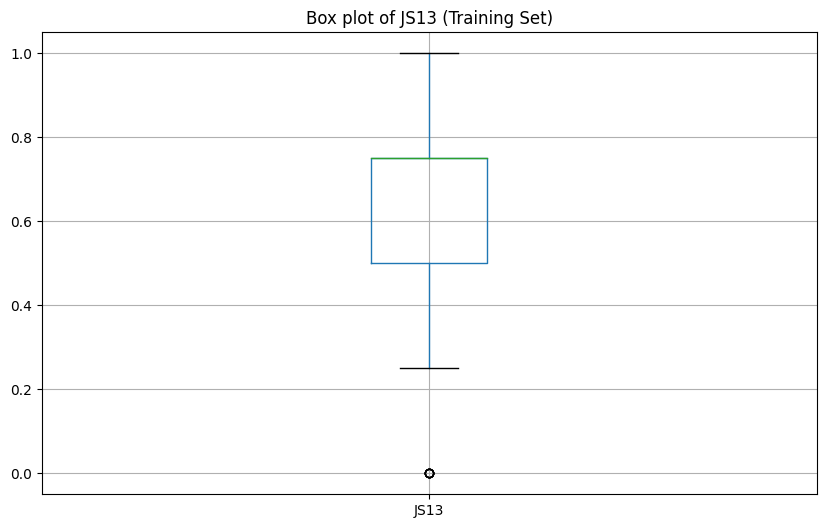

JS14 - Number of Outliers: 6


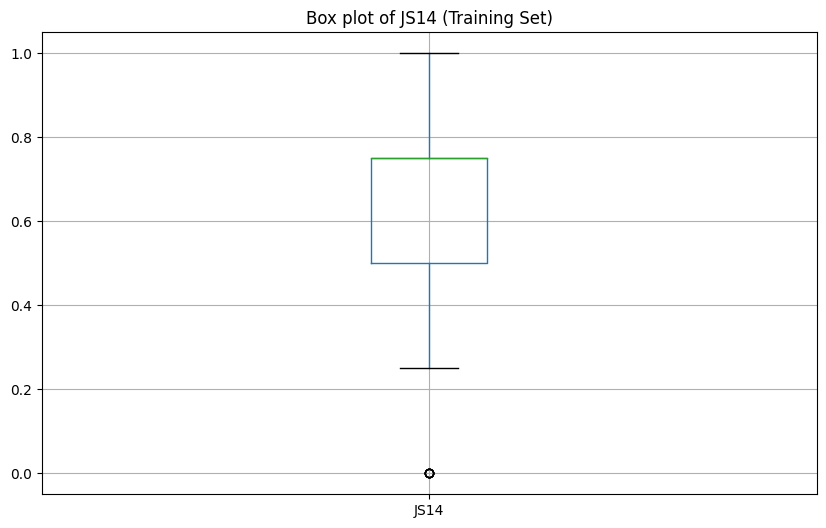

JS15 - Number of Outliers: 0


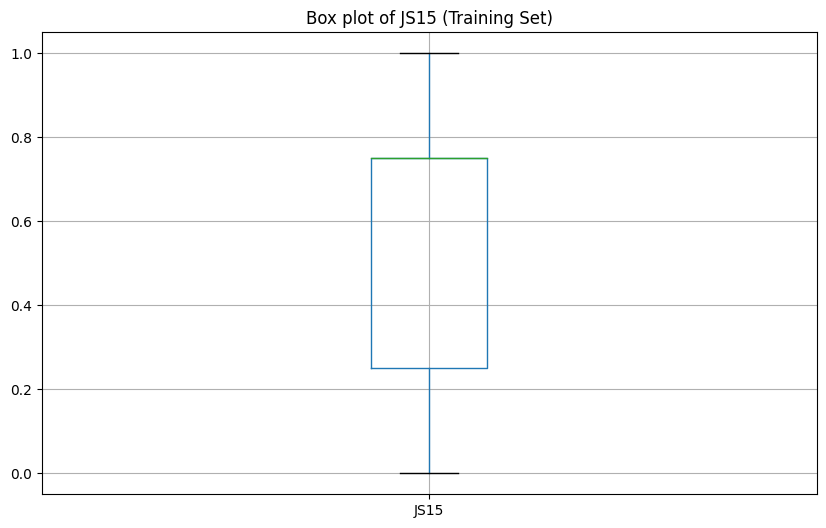

JS16 - Number of Outliers: 8


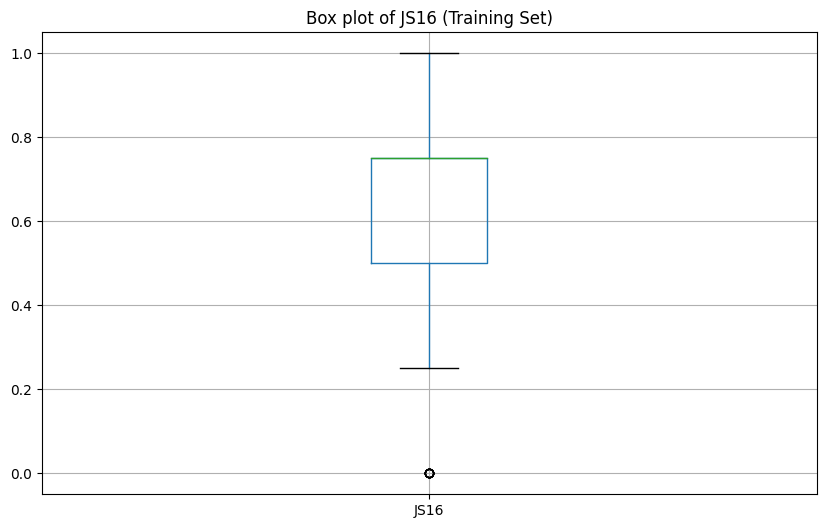

JS17 - Number of Outliers: 3


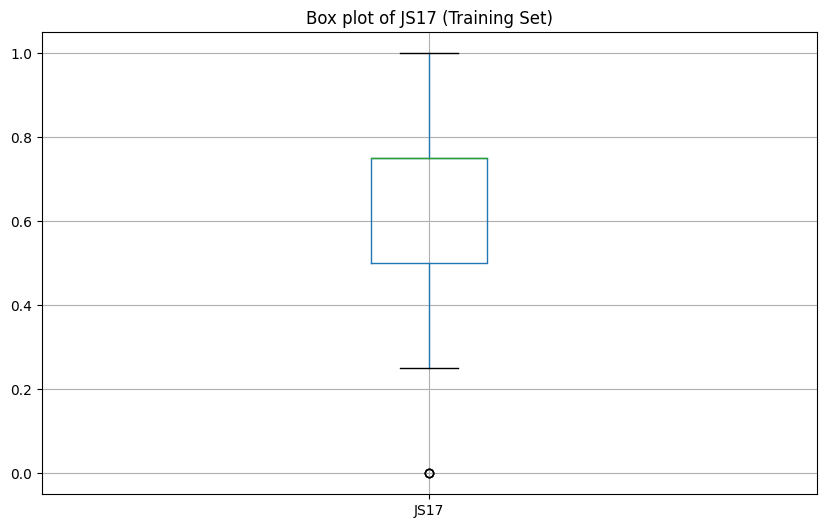

JS18 - Number of Outliers: 17


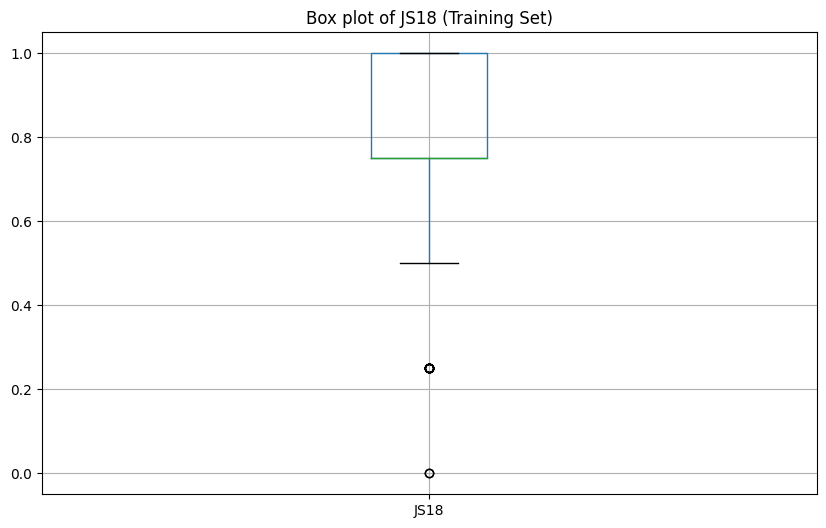

JS19 - Number of Outliers: 4


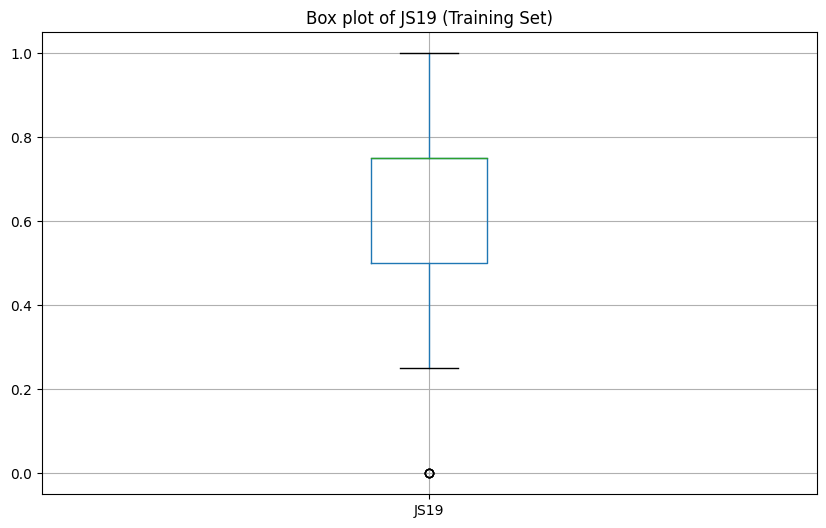

JS20 - Number of Outliers: 4


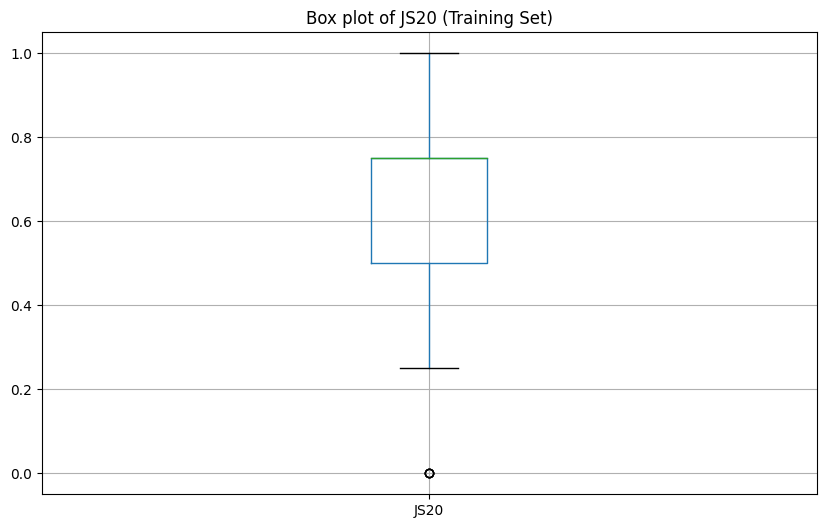

JS21 - Number of Outliers: 0


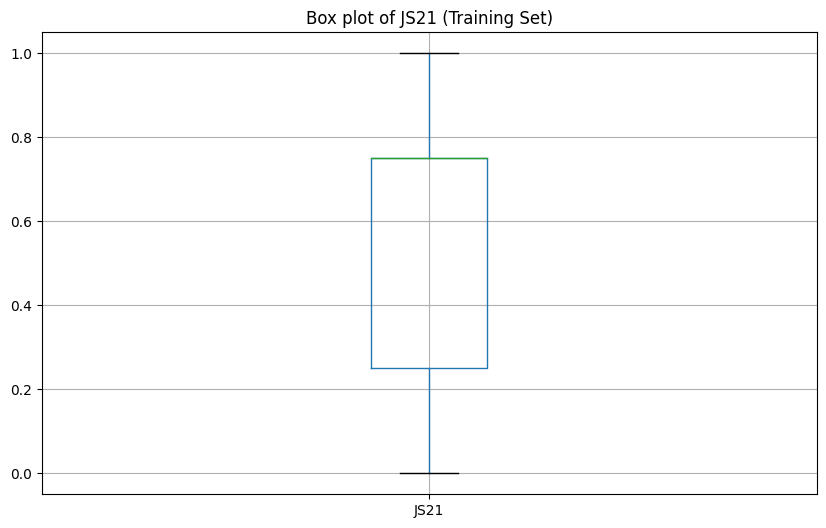

JS22 - Number of Outliers: 0


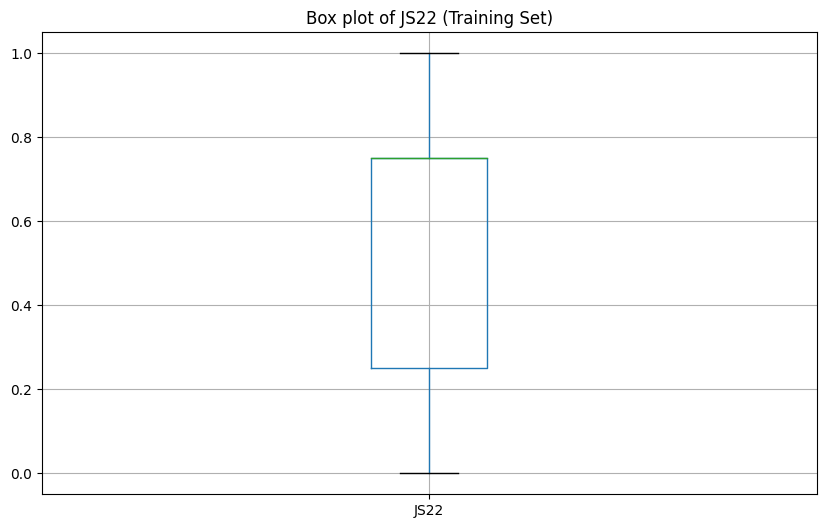

JS23 - Number of Outliers: 0


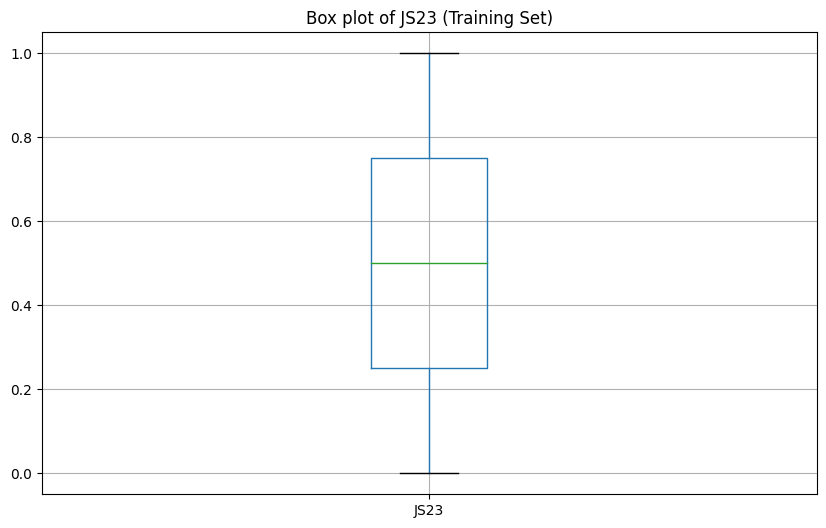

JS24 - Number of Outliers: 0


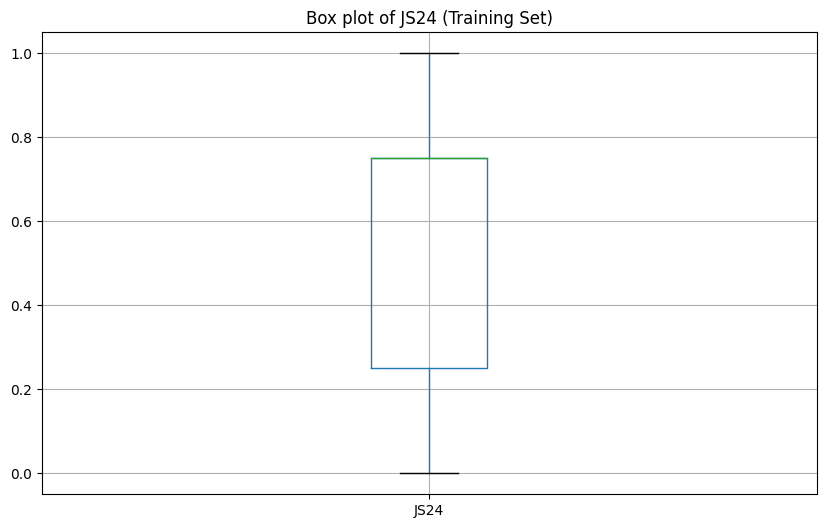

JS25 - Number of Outliers: 8


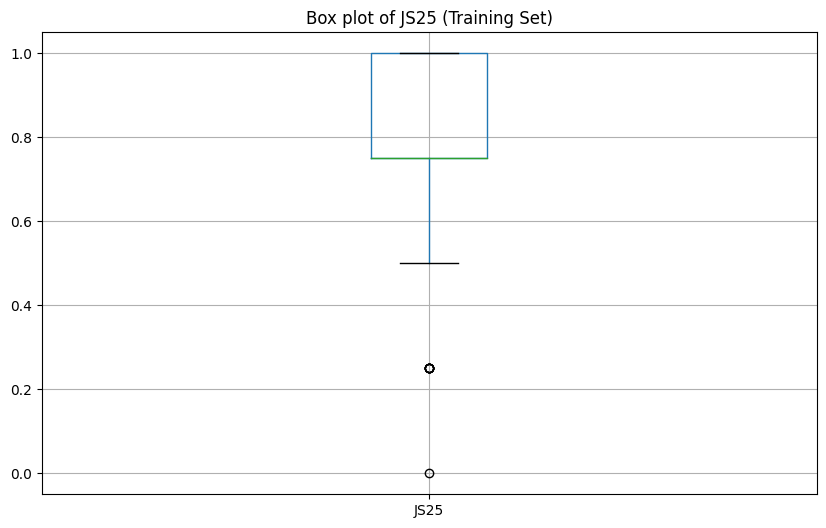

JS26 - Number of Outliers: 8


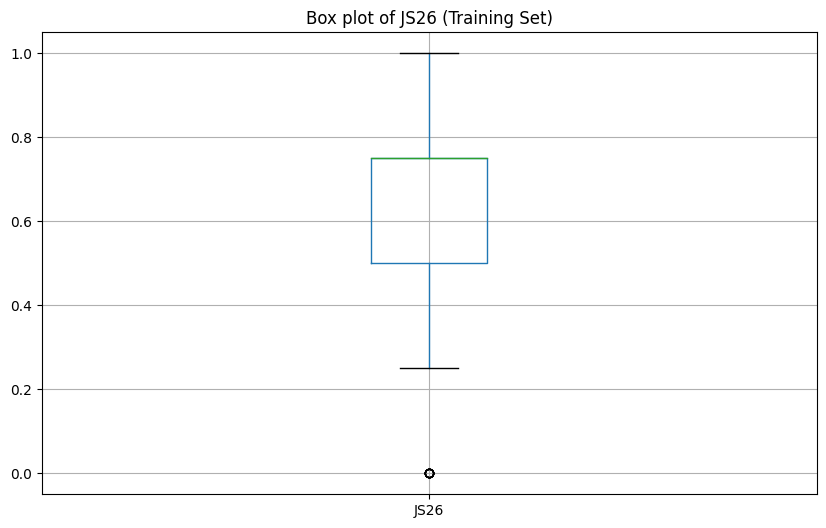

JS27 - Number of Outliers: 92


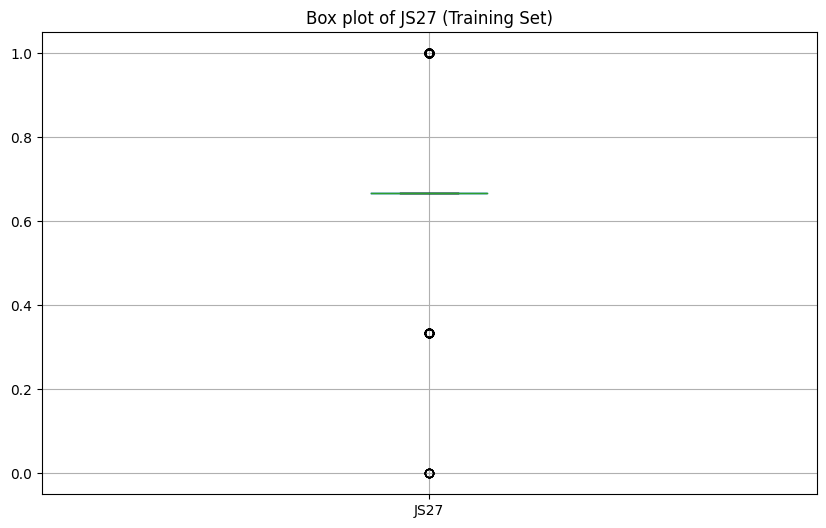

JS28 - Number of Outliers: 30


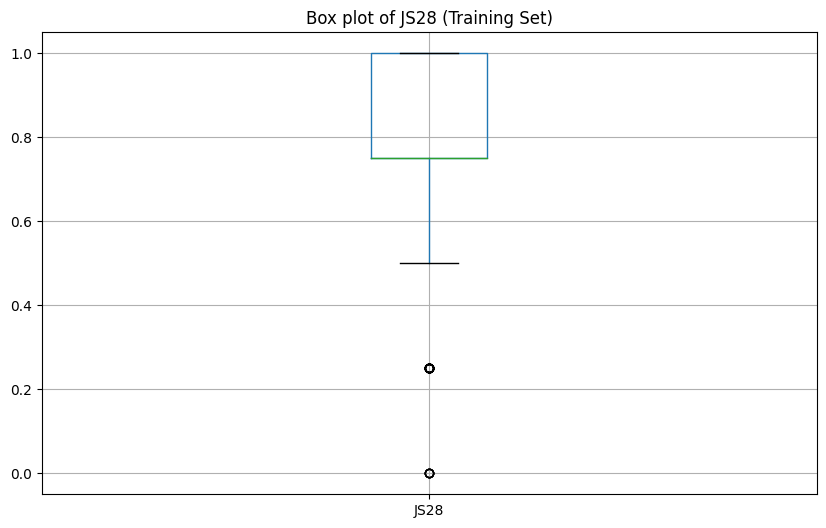

JS29 - Number of Outliers: 28


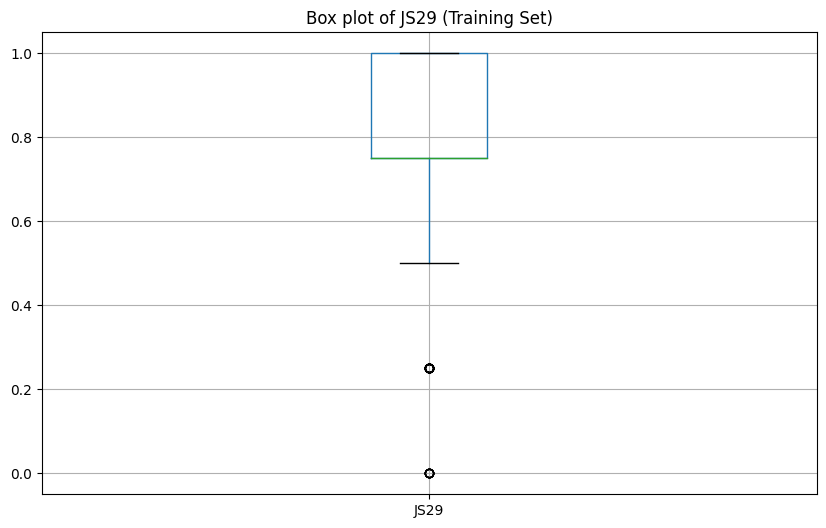

JS30 - Number of Outliers: 5


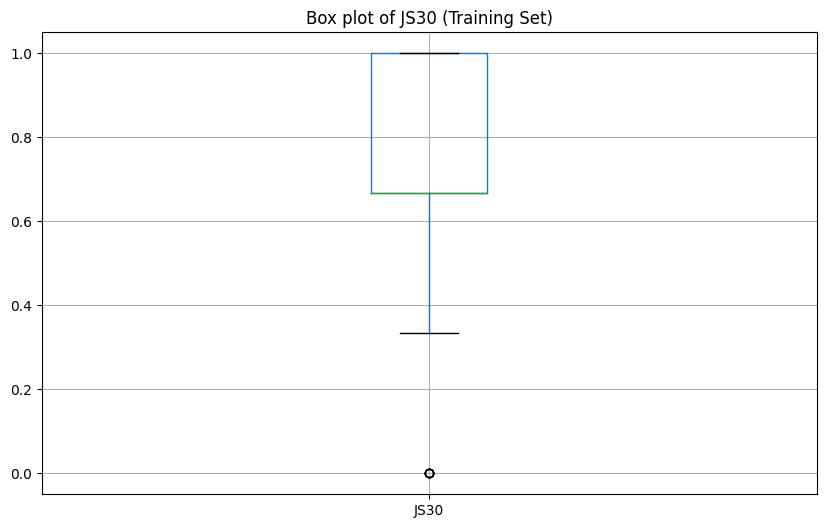

JS31 - Number of Outliers: 5


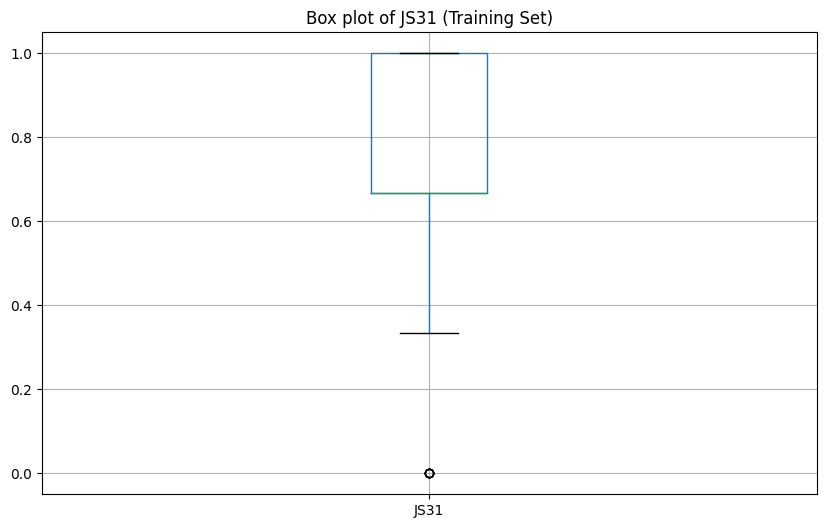

JS32 - Number of Outliers: 11


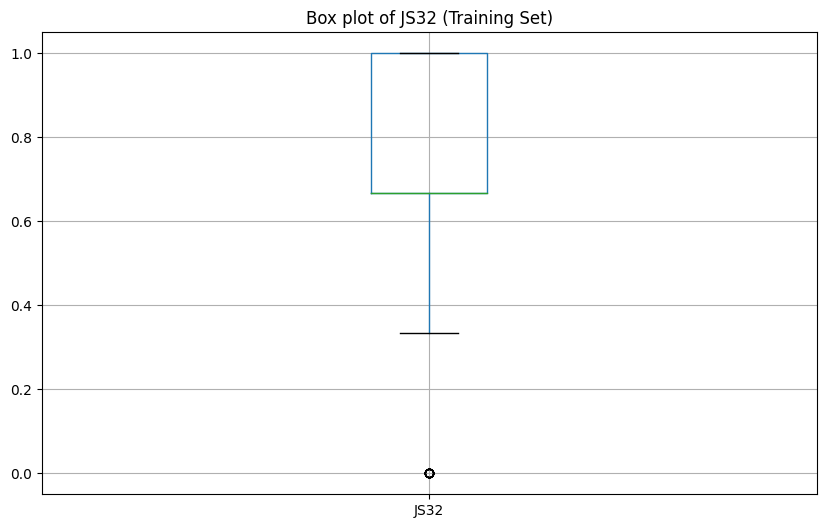

JS33 - Number of Outliers: 48


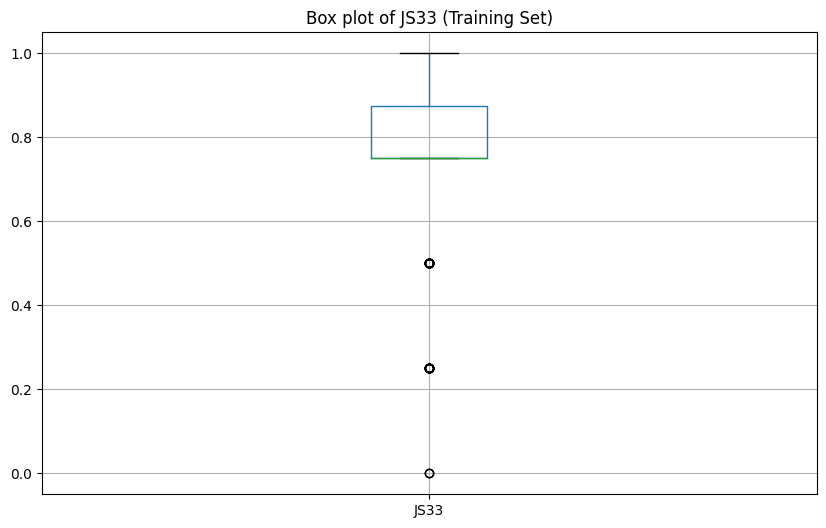

JS34 - Number of Outliers: 24


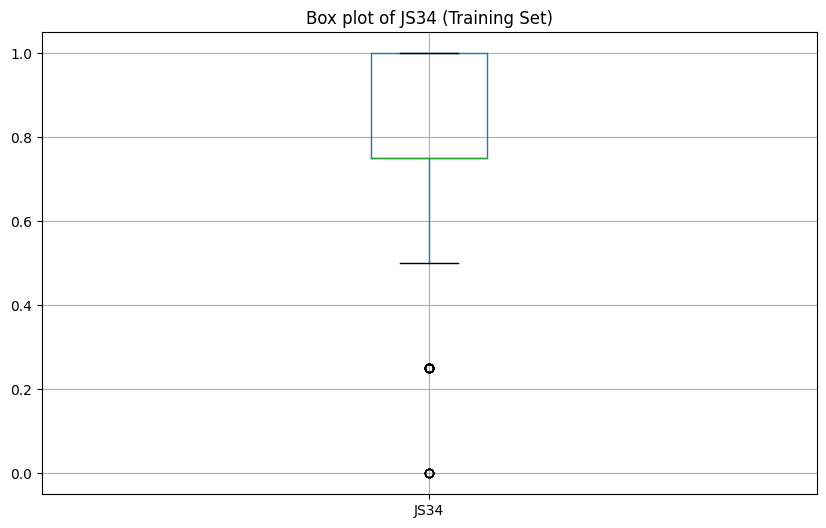

JS35 - Number of Outliers: 4


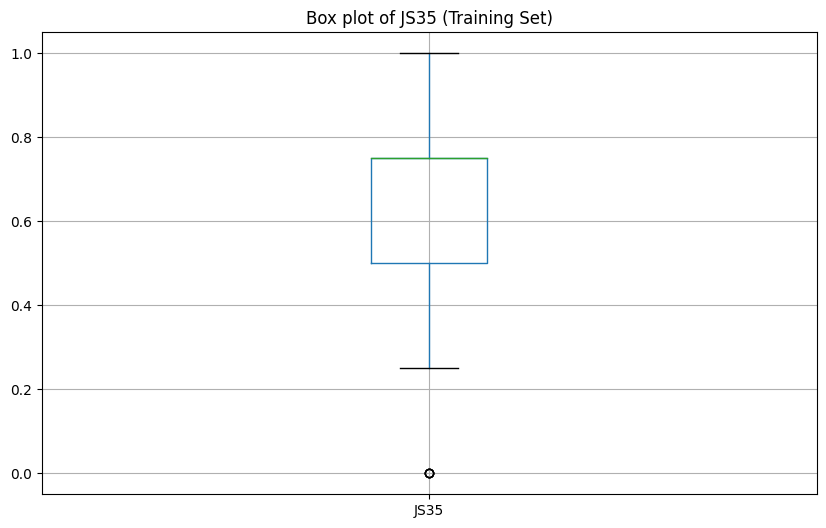

JS36 - Number of Outliers: 5


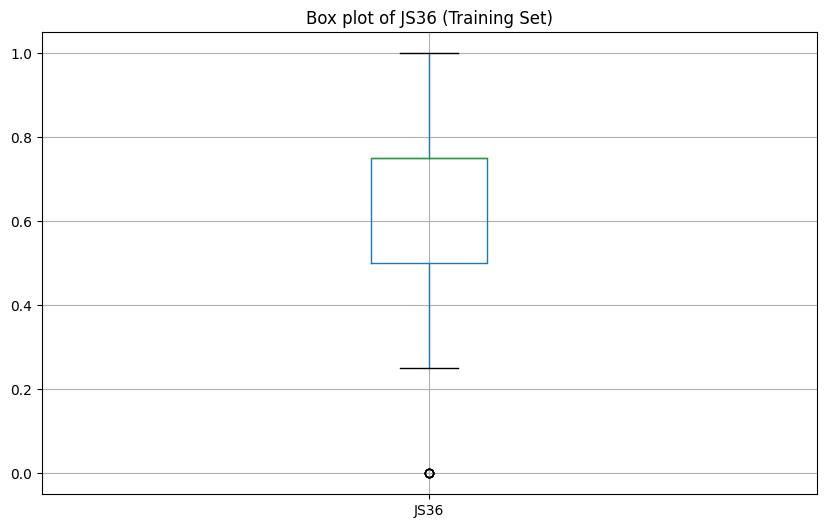

JP1 - Number of Outliers: 7


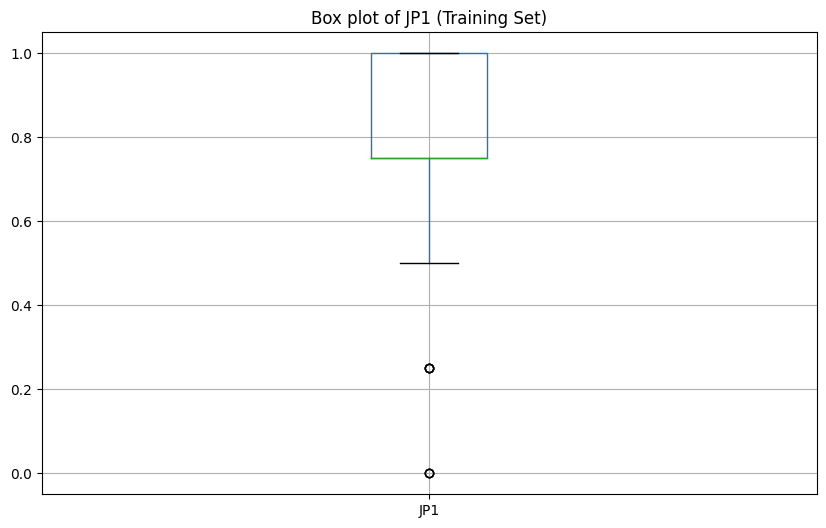

JP2 - Number of Outliers: 6


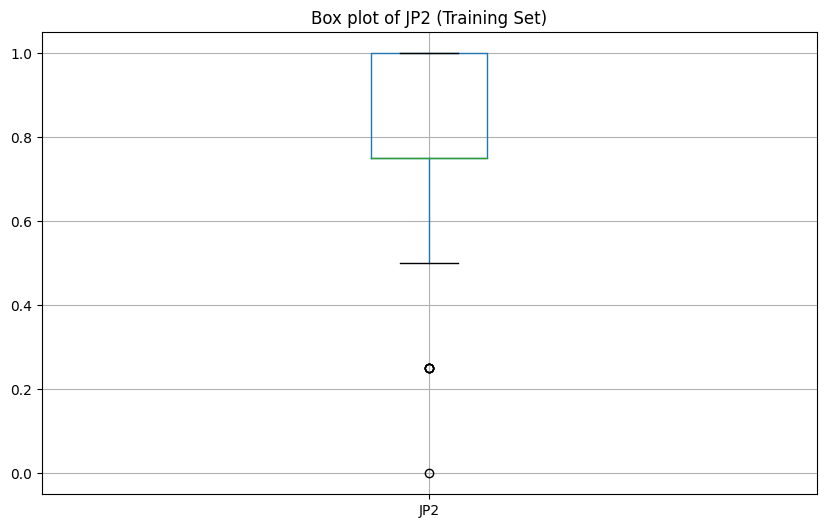

JP3 - Number of Outliers: 16


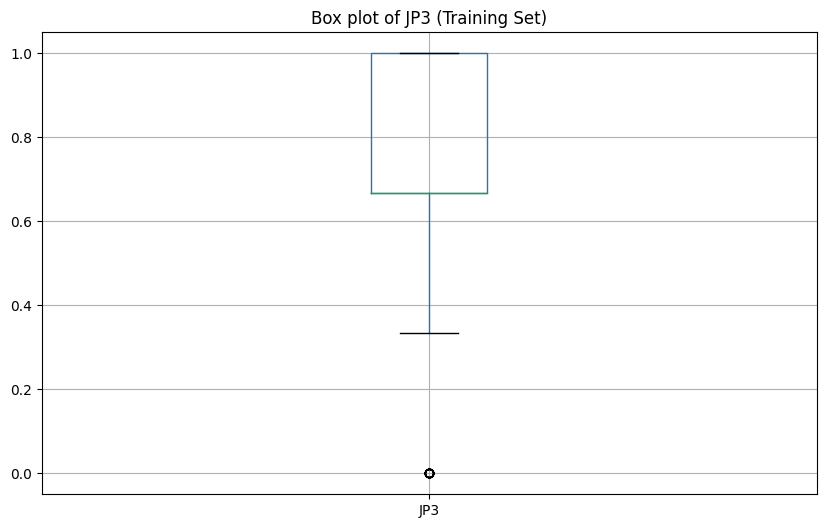

JP4 - Number of Outliers: 25


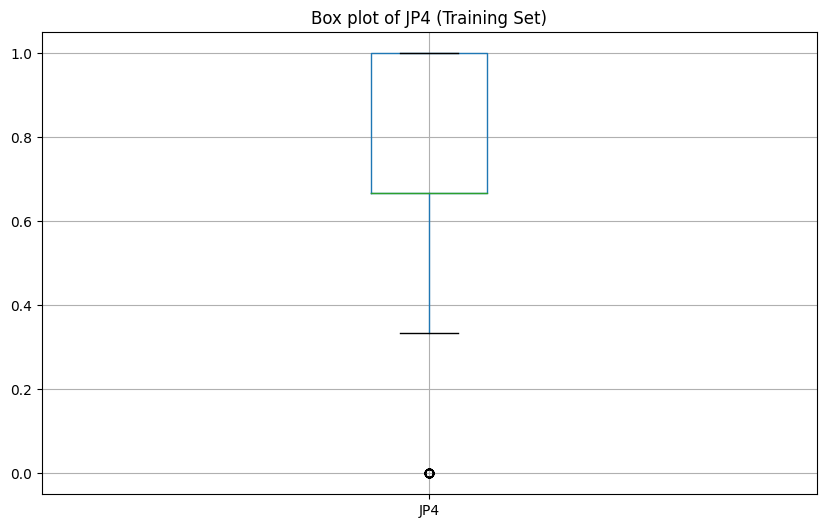

JP5 - Number of Outliers: 12


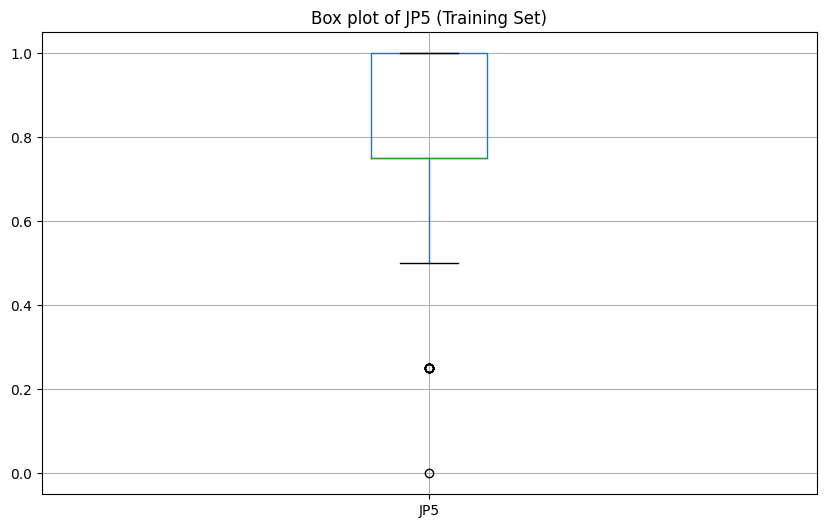

JP6 - Number of Outliers: 3


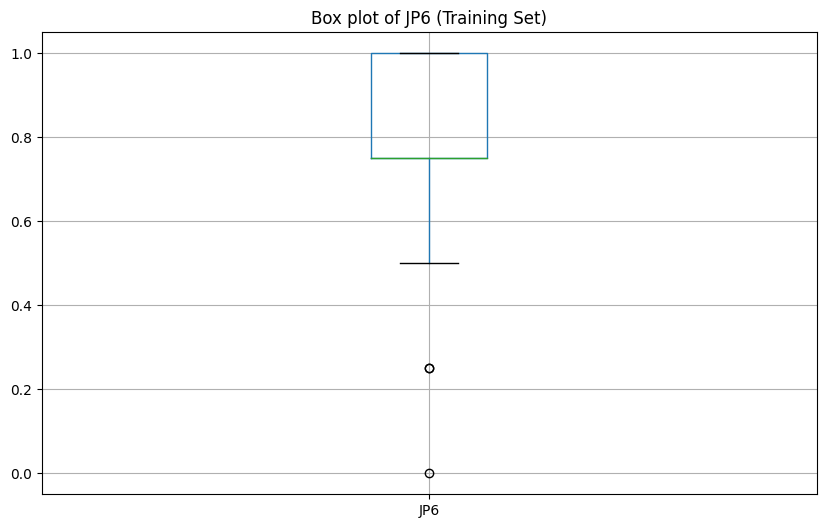

In [ ]:
# Step 2: Detect and handle outliers in the training set
for column in X_train.columns:
    # Calculate IQR
    Q1 = X_train[column].quantile(0.25)
    Q3 = X_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = X_train[(X_train[column] < lower_bound) | (X_train[column] > upper_bound)]
    print(f"{column} - Number of Outliers: {len(outliers)}")

    # Visualize outliers with a box plot
    plt.figure(figsize=(10, 6))
    X_train.boxplot([column])
    plt.title(f"Box plot of {column} (Training Set)")
    plt.show()

    # Replace outliers with the column mean (excluding outliers)
    mean_value = X_train[(X_train[column] >= lower_bound) & (X_train[column] <= upper_bound)][column].mean()
    X_train.loc[(X_train[column] < lower_bound) | (X_train[column] > upper_bound), column] = mean_value


#Feature Selection

#Zero variance

In [ ]:
X_train.shape

(247, 53)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Store the original column names
original_columns = X_train.columns

# Initialize the VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.0)

# Fit to the training data and transform it
X_train_transformed = sel.fit_transform(X_train)

# Transform the test data
X_test_transformed = sel.transform(X_test)

# Apply the mask to the original columns to keep the column names
selected_columns = original_columns[sel.get_support()]

# Recreate DataFrames with the selected columns
X_train = pd.DataFrame(X_train_transformed, columns=selected_columns)
X_test = pd.DataFrame(X_test_transformed, columns=selected_columns)

print("Shapes after feature selection - X_train:", X_train.shape, ", X_test:", X_test.shape)


Shapes after feature selection - X_train: (247, 47) , X_test: (62, 47)


# RFECV

In [ ]:
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

Optimal number of features: 28
Shape of X_train after RFECV: (247, 28)
Shape of X_test after RFECV: (62, 28)


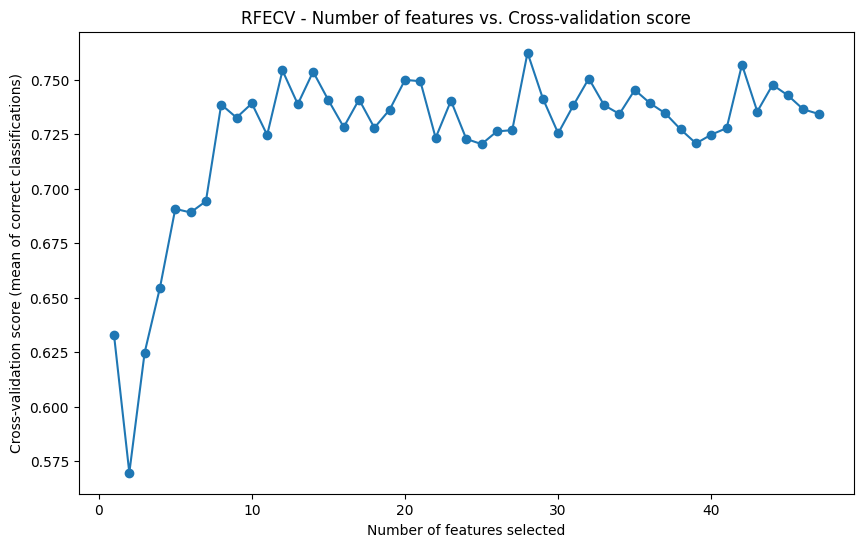

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

# Example with RandomForestClassifier
estimator = RandomForestClassifier(random_state=42)

# Configure RFECV
# Note: Adjust the cv parameter based on your dataset size and the scoring parameter as per your objective
rfecv = RFECV(estimator, step=1, cv=StratifiedKFold(5), scoring='f1_macro')

# Fit RFECV
estimator = rfecv.fit(X_train, y_train)

# Print the optimal number of features
print("Optimal number of features:", rfecv.n_features_)

# Select features based on RFECV support
X_train_selected = X_train.iloc[:, rfecv.support_]
X_test_selected = X_test.iloc[:, rfecv.support_]

print(f"Shape of X_train after RFECV: {X_train_selected.shape}")
print(f"Shape of X_test after RFECV: {X_test_selected.shape}")

import matplotlib.pyplot as plt

# Check if 'cv_results_' attribute exists
if hasattr(rfecv, 'cv_results_'):
    # Extract mean test scores
    mean_score = rfecv.cv_results_['mean_test_score']
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(mean_score) + 1), mean_score, marker='o')
    plt.title('RFECV - Number of features vs. Cross-validation score')
    plt.xlabel('Number of features selected')
    plt.ylabel('Cross-validation score (mean of correct classifications)')
    plt.show()
else:
    print("The 'cv_results_' attribute is not available in your version of scikit-learn.")



<ipython-input-19-d9cb7e0f7af8>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=important_features_df, x='Importance', y='Feature', palette='viridis')


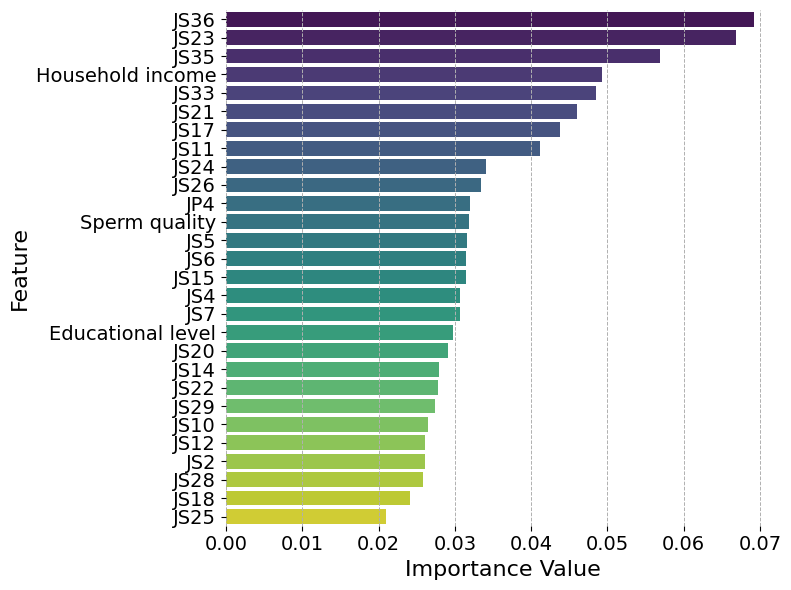

Top 28 Important Features Found by RFECV:
JS36: 0.06914651635532884
JS23: 0.06684010697745188
JS35: 0.05685831354650326
Household income: 0.04927903810899123
JS33: 0.048444305907220854
JS21: 0.0459396655117747
JS17: 0.04375717678563186
JS11: 0.04115297351079068
JS24: 0.0341112652241883
JS26: 0.03346204676766449
JP4: 0.03193812519055772
Sperm quality: 0.031851134942046354
JS5: 0.031625136678609625
JS6: 0.03140409804873221
JS15: 0.031402388494940175
JS4: 0.030663788574002638
JS7: 0.030626553637680895
Educational level: 0.02973138859454101
JS20: 0.029095766166761745
JS14: 0.02789737558670134
JS22: 0.027815184510923362
JS29: 0.02734674829559093
JS10: 0.02652799435587466
JS12: 0.0261475195753858
JS2: 0.026118449535782573
JS28: 0.02579694142059982
JS18: 0.02409802502502031
JS25: 0.020921972670702706


In [ ]:
import seaborn as sns

# Plot the feature importances
if hasattr(rfecv, 'estimator_'):  # The fitted estimator within RFECV
    fitted_estimator = rfecv.estimator_
    feature_importances = fitted_estimator.feature_importances_

    # Get the selected feature names
    selected_features = X_train.columns[rfecv.support_]

    # Combine feature names with their importance scores
    feature_importance_dict = dict(zip(selected_features, feature_importances))

    # Sort the features by importance
    important_features_sorted = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

    # Convert to a DataFrame for easy plotting
    important_features_df = pd.DataFrame(important_features_sorted, columns=['Feature', 'Importance'])

    # Plot the top 15 important features
    plt.figure(figsize=(8, 6))
    sns.barplot(data=important_features_df, x='Importance', y='Feature', palette='viridis')
    # plt.title('Top 15 Important Features Found by RFECV', fontsize=16)
    plt.xlabel('Importance Value', fontsize=16)
    plt.ylabel('Feature', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(True, axis='x', linestyle='--', linewidth=0.7)

    # Remove the black box around the plot
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.tight_layout()
    plt.savefig('Fig12(a).pdf', format='pdf', dpi=300)
    plt.show()

    print("Top 28 Important Features Found by RFECV:")
    for feature, importance in important_features_sorted:
        print(f"{feature}: {importance}")
else:
    print("RFECV instance is either not fitted or doesn't contain an 'estimator_' attribute.")

In [ ]:
X_train = X_train_selected

In [ ]:
X_test = X_test_selected

In [ ]:
X_train.columns

Index(['Educational level', 'Household income', 'Sperm quality', 'JS2', 'JS4',
       'JS5', 'JS6', 'JS7', 'JS10', 'JS11', 'JS12', 'JS14', 'JS15', 'JS17',
       'JS18', 'JS20', 'JS21', 'JS22', 'JS23', 'JS24', 'JS25', 'JS26', 'JS28',
       'JS29', 'JS33', 'JS35', 'JS36', 'JP4'],
      dtype='object')

# Model Selection

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# import numpy as np



# Hyperparameter Optimization - Randomized Search CV

In [ ]:
# Define model hyperparameter spaces
param_distributions = {
    'GaussianNB': {},  # Naive Bayes doesn't have relevant hyperparameters for tuning in this context
    'DecisionTreeClassifier': {
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'RandomForestClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'AdaBoostClassifier': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    'LGBMClassifier': {
        'num_leaves': [31, 62, 127],
        'learning_rate': [0.01, 0.1, 0.5],
        'n_estimators': [100, 200, 300]
    },
    'XGBClassifier': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 6, 9]
    },
    'LinearRegression': {},  # Linear Regression typically does not need hyperparameter tuning for most cases
    'LogisticRegression': {
        'C': np.logspace(-4, 4, 20),
        'solver': ['liblinear', 'lbfgs']
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

# Instantiate models
models = {
    'GaussianNB': GaussianNB(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'LGBMClassifier': LGBMClassifier(random_state=42),
    'XGBClassifier': XGBClassifier(random_state=42),
    'LinearRegression': LinearRegression(),
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier()
}

best_params = {}

for model_name, model in models.items():
    print(f"Running RandomizedSearchCV for {model_name}")
    clf = RandomizedSearchCV(model, param_distributions[model_name], n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
    clf.fit(X_train, y_train)
    best_params[model_name] = clf.best_params_
    print(f"Best parameters for {model_name}: {clf.best_params_}")

Running RandomizedSearchCV for GaussianNB
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for GaussianNB: {}
Running RandomizedSearchCV for DecisionTreeClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for DecisionTreeClassifier: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 40}
Running RandomizedSearchCV for RandomForestClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for RandomForestClassifier: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20}
Running RandomizedSearchCV for AdaBoostClassifier
Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for AdaBoostClassifier: {'n_estimators': 50, 'learning_rate': 0.1}
Running RandomizedSearchCV for LGBMClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 157, number of negative: 90
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 157
[LightGBM] [Info] Number of data points in the train set: 247, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.635628 -> initscore=0.556436
[LightGBM] [Info] Start training from score 0.556436
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for LogisticRegression: {'solver': 'lbfgs', 'C': 29.763514416313132}
Running RandomizedSearchCV for SVC
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for SVC: {'kernel': 'linear', 'C': 0.1}
Running RandomizedSearchCV for KNeighborsClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for KNeighborsClassifier: {'weights': 'uniform', 'n_neighbors': 9, 'metric': 'manhattan'}


# Model Training and Evaluation

Classification Report for GaussianNB:
              precision    recall  f1-score   support

           0     0.6667    0.6087    0.6364        23
           1     0.7805    0.8205    0.8000        39

    accuracy                         0.7419        62
   macro avg     0.7236    0.7146    0.7182        62
weighted avg     0.7383    0.7419    0.7393        62



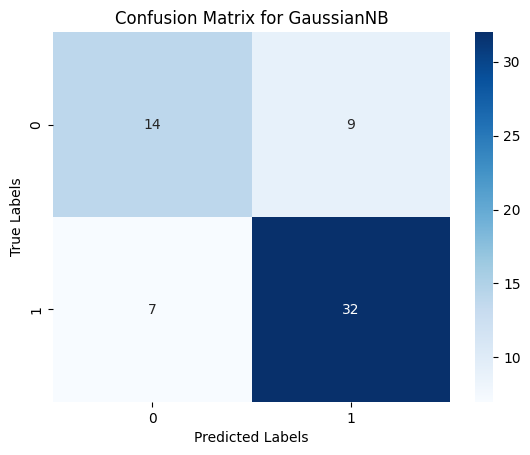

Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0     0.8182    0.3913    0.5294        23
           1     0.7255    0.9487    0.8222        39

    accuracy                         0.7419        62
   macro avg     0.7718    0.6700    0.6758        62
weighted avg     0.7599    0.7419    0.7136        62



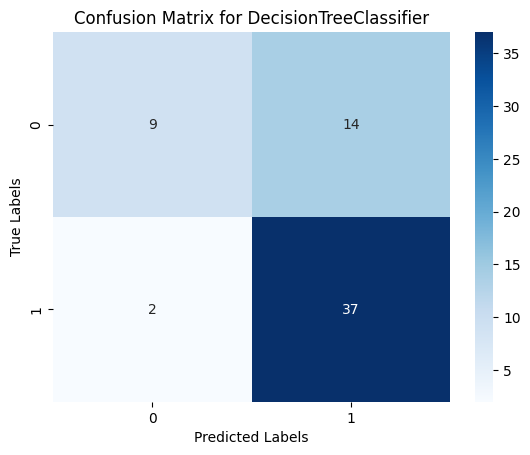

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0     0.7778    0.6087    0.6829        23
           1     0.7955    0.8974    0.8434        39

    accuracy                         0.7903        62
   macro avg     0.7866    0.7531    0.7632        62
weighted avg     0.7889    0.7903    0.7839        62



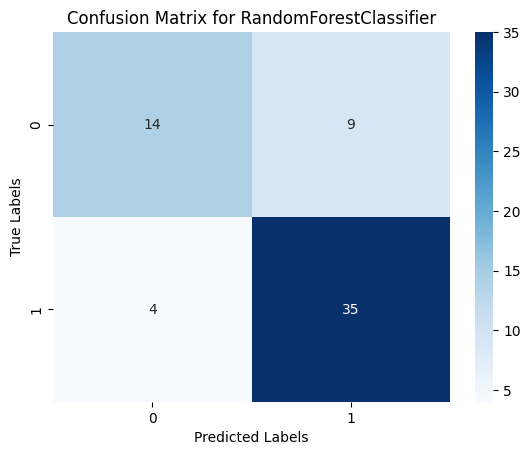

Classification Report for AdaBoostClassifier:
              precision    recall  f1-score   support

           0     0.8667    0.5652    0.6842        23
           1     0.7872    0.9487    0.8605        39

    accuracy                         0.8065        62
   macro avg     0.8270    0.7570    0.7723        62
weighted avg     0.8167    0.8065    0.7951        62



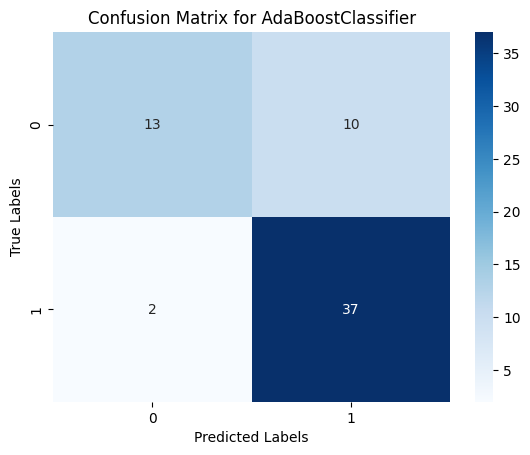

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 157, number of negative: 90
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 157
[LightGBM] [Info] Number of data points in the train set: 247, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.635628 -> initscore=0.556436
[LightGBM] [Info] Start training from score 0.556436
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

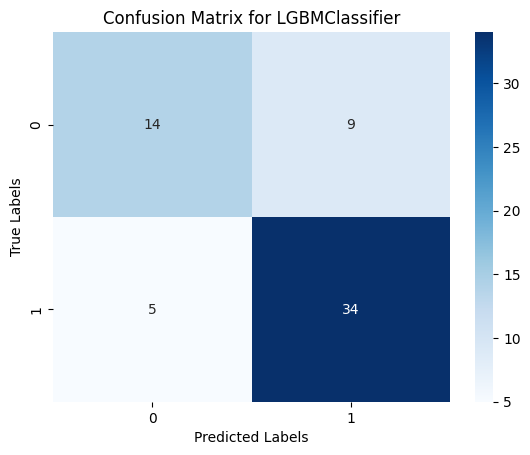

Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0     0.7273    0.6957    0.7111        23
           1     0.8250    0.8462    0.8354        39

    accuracy                         0.7903        62
   macro avg     0.7761    0.7709    0.7733        62
weighted avg     0.7887    0.7903    0.7893        62



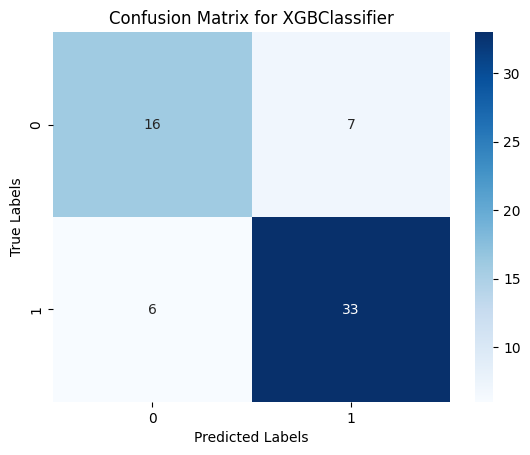

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0     0.8000    0.6957    0.7442        23
           1     0.8333    0.8974    0.8642        39

    accuracy                         0.8226        62
   macro avg     0.8167    0.7965    0.8042        62
weighted avg     0.8210    0.8226    0.8197        62



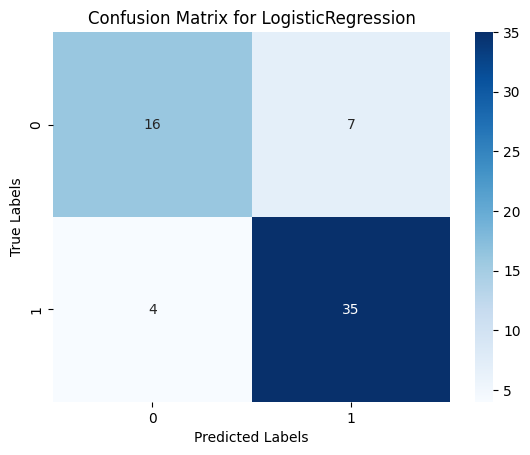

Classification Report for SVC:
              precision    recall  f1-score   support

           0     0.9444    0.7391    0.8293        23
           1     0.8636    0.9744    0.9157        39

    accuracy                         0.8871        62
   macro avg     0.9040    0.8567    0.8725        62
weighted avg     0.8936    0.8871    0.8836        62



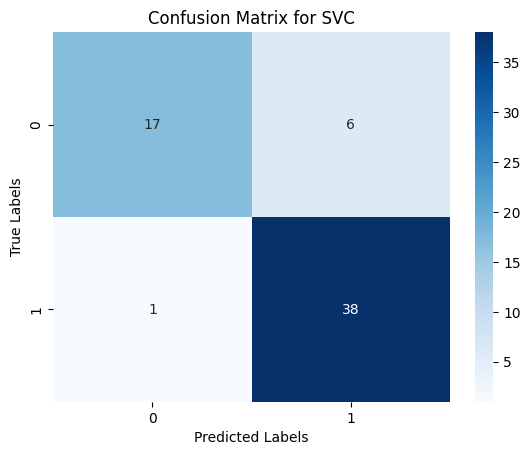

Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0     0.8000    0.5217    0.6316        23
           1     0.7660    0.9231    0.8372        39

    accuracy                         0.7742        62
   macro avg     0.7830    0.7224    0.7344        62
weighted avg     0.7786    0.7742    0.7609        62



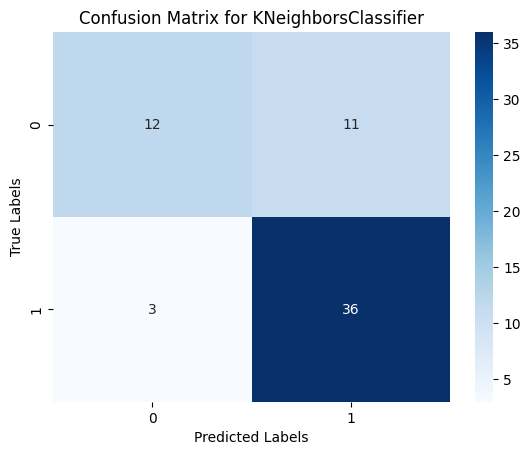

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

for model_name, model in models.items():
    # Skip LinearRegression for confusion matrix and classification report
    if model_name == 'LinearRegression':
        continue

    # Initialize the model with the best parameters
    optimized_model = model.set_params(**best_params[model_name])

    # Train the model
    optimized_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = optimized_model.predict(X_test)

    # Print the classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred, digits = 4))

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


# Ensemble Model Creation (Later)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Instantiate the individual models with the best parameters
rf_best = RandomForestClassifier(**best_params['RandomForestClassifier'])
lr_best = LogisticRegression(**best_params['LogisticRegression'])
svc_best = SVC(**best_params['SVC'], probability=True)  # probability=True is necessary for soft voting

# Create an ensemble for hard voting
voting_clf_hard = VotingClassifier(
    estimators=[ ('rf', rf_best), ('svc', svc_best)],
    voting='hard'
)

# Create an ensemble for soft voting
voting_clf_soft = VotingClassifier(
    estimators=[ ('rf', rf_best), ('svc', svc_best)],
    voting='soft'
)


# Ensemble Model Training

In [ ]:

# Fit the hard voting classifier
print("Training hard voting classifier")
voting_clf_hard.fit(X_train, y_train)

# Fit the soft voting classifier
print("Training soft voting classifier")
voting_clf_soft.fit(X_train, y_train)



Training hard voting classifier
Training soft voting classifier


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=30,
                                                     n_estimators=300)),
                             ('svc',
                              SVC(C=0.1, kernel='linear', probability=True))],
                 voting='soft')

# Ensemble Model Evaluation


Classification Report for Hard Voting:
              precision    recall  f1-score   support

           0     0.7727    0.7391    0.7556        23
           1     0.8500    0.8718    0.8608        39

    accuracy                         0.8226        62
   macro avg     0.8114    0.8055    0.8082        62
weighted avg     0.8213    0.8226    0.8217        62



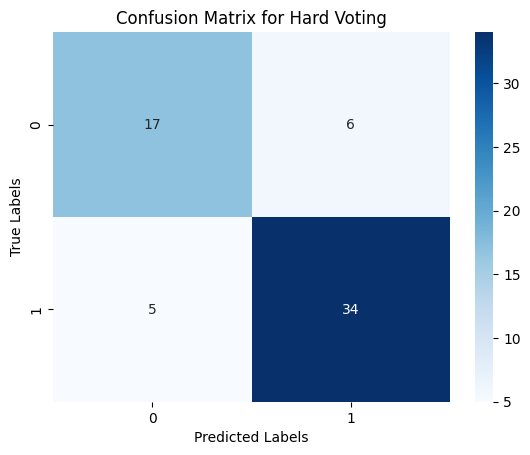


Classification Report for Soft Voting:
              precision    recall  f1-score   support

           0     0.8947    0.7391    0.8095        23
           1     0.8605    0.9487    0.9024        39

    accuracy                         0.8710        62
   macro avg     0.8776    0.8439    0.8560        62
weighted avg     0.8732    0.8710    0.8680        62



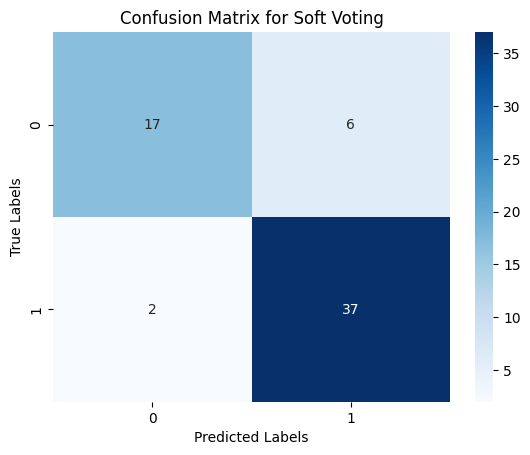

In [ ]:

# Evaluate both classifiers
for clf, label in zip([voting_clf_hard, voting_clf_soft], ['Hard Voting', 'Soft Voting']):
    y_pred = clf.predict(X_test)
    print(f"\nClassification Report for {label}:")
    print(classification_report(y_test, y_pred, digits = 4))

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {label}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Model Interpretation (Explainable AI) (Later)

# Model Deployment

# Ablation Study